# Modelo de Segregación de Schelling en `MESA`

### Reglas


- Dos diferentes tipos de agentes distribuidos en un espacio finito de dimensión 2.
- En cada iteración se elige un agente al azar y se mide el porcentaje que de ellos son del mismo tipo. Si el porcentaje es menor a cierto umbral salta aletoriamente a otro lugar libre en el espacio.


## Agente del modelo de Schelling

Esta la primera parte implementaremos el modelo sobre una malla, es decir en un espacio discreto.

Creamos una clase para el agente. En el `__init__` definimos las propiedades internas de cada agente. En este primer acercamiento consideraremos una misma tolerancia (similaridad) para todos los agentes por lo que ese atributo pertencerá a la clase modelo.


In [1]:
class AgenteSchelling:
    """
    Agente del modelo de Schelling Discreto
    Esta clase implementa un agente para el modelo de segregación de Schelling en una malla discreta.
    Atributos:
        tipo/color: "red" "blue". Str.
        pos: posición del agente. Tupla de enteros.       
    """
    def __init__(self,color,pos):
        self.color = color
        self.pos = pos

Creamos un agente a partir de nuestra clase definida arriba

In [2]:
agente1 = AgenteSchelling('red',(0,1))

Por medio del punto (.) podemos acceder a los atributos de nuestra clase agente

In [3]:
print(agente1.color)
print(agente1.pos)

red
(0, 1)


## Importamos la clase Agent y Model del modulo `MESA`

Utilizaremos la ventajas de la OOP (programación orientada a objetos) y creamos una clase secundaria (clase hija) a partir de la clase `Agent`  de `mesa` (clase madre).

In [4]:
from mesa import Agent, Model

In [5]:
class AgenteSchelling(Agent):
    """
    Agente del modelo de Schelling
    Esta clase implementa un agente para el modelo de segregación de Schelling en una malla discreta.
    Atributos:
        tipo/color: "red" "blue". Str.
        pos: posición del agente. Tupla de enteros.
        modelo: Nuestro clase modelo. Modelo mesa.
    """
    def __init__(self,color,pos, model):
        # Aqui van los atributos del agente
        self.color = color
        self.pos = pos
        self.model  = model
        

También creamos una clase hija para nuestro modelo a partir de la clase `Model`  de `mesa`.

In [6]:
class ModeloSchelling(Model):
    """
    Modelo de Schelling,
    Esta clase implementa el modelo de segregación de Schelling en una malla discreta.

    ancho: ancho de la malla. Int
    largo: largo de la malla. Int
    tolerancia: porcentaje de vecinos al menos iguales al del agente. Float.

    """
    def __init__(self,ancho,largo,tolerancia):
        self.ancho = ancho
        self.largo = largo
        self.tolerancia = tolerancia

## Definimos el espacio donde se van a mover los agentes

`mesa.space` contiene diferentes tipos de configuraciones espaciales donde se moverán los agentes:  `Single, MultiGrid, ContinouosSpace, HexGrid, NetworkGrid.`
`SingleGrid` permite colocar solomente un agente en cada posición de una malla discreta.

In [7]:
from mesa.space import SingleGrid 

In [8]:
class AgenteSchelling(Agent):
    """
    Agente del modelo de Schelling
    Esta clase implementa un agente para el modelo de segregación de Schelling en una malla discreta.
    Atributos:
        tipo/color: "red" "blue". Str.
        pos: posición del agente. Tupla de enteros.
        modelo: Nuestro clase modelo. Modelo mesa.
    """
    def __init__(self,color,pos, model):
        # Aqui van los atributos del agente
        self.color = color
        self.pos = pos
        self.model  = model
        
class ModeloSchelling(Model):
    """
    Modelo de Schelling,
    Esta clase implementa el modelo de segregación de Schelling en una malla discreta.

    ancho: ancho de la malla. Int
    largo: largo de la malla. Int
    tolerancia: porcentaje de vecinos al menos iguales al del agente. Float.

    """
    def __init__(self,ancho,largo,tolerancia):
        self.ancho = ancho
        self.largo = largo
        self.tolerancia = tolerancia

        # Con torus=True le decimos que active la topología en forma de toroide
        self.grid = SingleGrid(ancho, largo, torus= True)

Inicializamos el modelo

In [9]:
modelo_prueba = ModeloSchelling(10,10,0.4)

# Atributos del modelo
print(modelo_prueba.ancho)
print(modelo_prueba.largo)
print(modelo_prueba.tolerancia)

10
10
0.4


Inicializamos un agente

In [10]:
agente1 = AgenteSchelling('rojo',(0,0), modelo_prueba)

# Atributos del agente
print(agente1.color)
print(agente1.pos)

rojo
(0, 0)


Podemos acceder a la malla

In [11]:
modelo_prueba.grid.grid

[[None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None]]

Con `.find_empty` encontramos un lugar aleatorio vacío

In [12]:
modelo_prueba.grid.find_empty()

(7, 0)

## Definimos la regla que obecede cada agente

Dentro de nuestra clase `AgenteSchelling` se define un método llamado `step()` en el cual se programará las reglas que siguen los agentes.

In [13]:
class AgenteSchelling(Agent):
    """
    Agente del modelo de Schelling
    Esta clase implementa un agente para el modelo de segregación de Schelling en una malla discreta.
    Atributos:
        tipo/color: "red" "blue". Str.
        pos: posición del agente. Tupla de enteros.
        modelo: Nuestro clase modelo. Modelo mesa.
    """
    def __init__(self,color,pos, model):
        # Aqui van los atributos del agente
        self.color = color
        self.pos = pos
        self.model  = model
        
    def step(self):
        #Buscar si hay algún otro agente en su vecindad cercana. Para el modelo de segregación utilizamos una vecindad de Moore
        vecinos = self.model.grid.get_neighbors(self.pos, moore=True, include_center=False)
        
        # Contamos cuantos agentes vecinos son similares a nuestro agente
        vecindad = 0
        for i in vecinos:
            if i.color == self.color:
                vecindad += 1 # vecindad = vecindad + 1
                
        vecindad /= 8 # vecindad =  vecindad / 8         
        
        # Si el porcentaje de vecinos es menor a cierto porcentaje de tolerancia,
        # el agente se mueve a un lugar vacío
        if vecindad < self.model.tolerancia:
            self.model.grid.move_to_empty(self)
        

## Definimos la configuración inicial del modelo

In [14]:
class ModeloSchelling(Model):
    """
    Modelo de Schelling,
    Esta clase implementa el modelo de segregación de Schelling en una malla discreta.

    ancho: ancho de la malla. Int
    largo: largo de la malla. Int
    tolerancia: porcentaje de vecinos al menos iguales al del agente. Float.
    cantidad: número de agentes que colocaremos en la malla. Int
    """
    def __init__(self,ancho,largo, tolerancia, cantidad):
        self.ancho = ancho
        self.largo = largo
        self.tolerancia = tolerancia
        self.cantidad = cantidad
        colores = ["red", "blue"]
        
        # Con torus=True le decimos que active la topología en forma de toroide
        self.grid = SingleGrid(ancho, largo, torus= True)

        
        for i in range(cantidad):
            color = self.random.choice(colores)
            pos = self.grid.find_empty()
            # Como estamos dentro de la clase para hacer referencia al modelo lo hacemos como self
            agente = AgenteSchelling(color,pos,self )
            # Después de crear el agente tenemos que colocarlo en la malla
            self.grid.place_agent(agente, pos)

Inicializamos el modelo. Colocamos sólo dos agentes para verfirificar que corra bien

In [15]:
modelo_prueba = ModeloSchelling(10,10,0.4,2)

Podemos acceder a la malla y saber que posciones ocupan los agentes en el espacio

In [16]:
modelo_prueba.grid.grid

[[None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None]]

Colocándonos en la posición del agente dentro de la malla podemos acceder a los atributos del agente

In [18]:
modelo_prueba.grid.grid[4][2].color

'blue'

### ¿En qué orden vamos a activar los agentes en cada iteración?

`mesa.time` contiene tres diferentes activación:  `BasedScheduler, RandomActivation, SimultaneousActivation, StagedActivation`
Con`RandomActivation` el orden de los agentes es aleatorio en cada iteracción o paso.

In [19]:
from mesa.time import RandomActivation 

In [20]:
class ModeloSchelling(Model):
    """
    Modelo de Schelling,
    Esta clase implementa el modelo de segregación de Schelling en una malla discreta.

    ancho: ancho de la malla. Int
    largo: largo de la malla. Int
    tolerancia: porcentaje de vecinos al menos iguales al del agente. Float.
    cantidad: número de agentes que colocaremos en la malla. Int
    """
    def __init__(self,ancho,largo,tolerancia, cantidad):
        self.ancho = ancho
        self.largo = largo
        self.tolerancia = tolerancia
        self.cantidad = cantidad
        colores = ["red", "blue"]

        # Activamos el orden aleatorio
        self.schedule = RandomActivation(self)
        self.grid = SingleGrid(ancho, largo, torus= True)

        
        for i in range(cantidad):
            color = self.random.choice(colores)
            pos = self.grid.find_empty()
            # Como estamos dentro de la clase para hacer referencia al modelo lo hacemos como self
            agente = AgenteSchelling(color,pos,self)
            # Después de crear el agente tenemos que colocarlo en la malla
            self.grid.place_agent(agente, pos)
            # De igual forma una vez creado el agente tenemos que 'agendarlo'
            self.schedule.add(agente)
    def step(self):
        # Avanza un paso en el tiempo.
        self.schedule.step()

Inicializamos el modelo

In [21]:
modelo_p1 = ModeloSchelling(10,10,0.4,60)

AttributeError: 'AgenteSchelling' object has no attribute 'unique_id'

Nos marca un error. Esto se debe a que la clase padre `Agent`, en la que basaremos nuestros agentes, necesita como argumentos un _identificador único_ y el _modelo_ como argumentos para inicializar un agente. Además queremos inicializar los valores en la clase padre, por lo que utilizamos `super().__init__(unique_id,model)` así que modificamos los argumentos del constructor de la clase `AgenteSchelling` además donde creamos los agentes dentro del modelo `ModeloSchelling`.


In [22]:
class AgenteSchelling(Agent):
    """
    Agente del modelo de Schelling
    Esta clase implementa un agente para el modelo de segregación de Schelling en una malla discreta.
    Atributos:
        tipo/color: "rojo" "azul". Str.
        pos: posición del agente. Tupla de enteros.
        modelo: Nuestro clase modelo. Modelo mesa. 
    """
    def __init__(self,unique_id, model,color,pos):
        # Aqui van los atributos del agente
        super().__init__(unique_id,model)
        self.color = color
        self.pos = pos
        self.model  = model
        
    def step(self):
        #Buscar si hay algún otro agente en su vecindad cercana. Para el modelo de segregación utilizamos una vecindad de Moore
        vecinos = self.model.grid.get_neighbors(self.pos, moore=True, include_center=False)
        
        # Contamos cuantos agentes vecinos son similares a nuestro agente
        vecindad = 0
        for i in vecinos:
            if i.color == self.color:
                vecindad += 1 # vecindad = vecindad + 1
                
        vecindad /= 8 # vecindad =  vecindad / 8         
        
        # Si el porcentaje de vecinos es menor a cierto porcentaje de tolerancia,
        # el agente se mueve a un lugar vacío
        if vecindad < self.model.tolerancia:
            self.model.grid.move_to_empty(self)
        

In [23]:
class ModeloSchelling(Model):
    """
    Modelo de Schelling,
    Esta clase implementa el modelo de segregación de Schelling en una malla discreta.

    ancho: ancho de la malla. Int
    largo: largo de la malla. Int
    tolerancia: porcentaje de vecinos al menos iguales al del agente. Float.
    cantidad: número de agentes que colocaremos en la malla. Int
    """
    def __init__(self,ancho,largo, tolerancia, cantidad):
        self.ancho = ancho
        self.largo = largo
        self.tolerancia = tolerancia
        self.cantidad = cantidad
        colores = ["red", "blue"]
        
        # Activamos el orden aleatorio
        self.schedule = RandomActivation(self)
        self.grid = SingleGrid(ancho, largo, torus= True)

        
        for i in range(cantidad):
            color = self.random.choice(colores)
            pos = self.grid.find_empty()
            # Como estamos dentro de la clase para hacer referencia al modelo lo hacemos como self
            agente = AgenteSchelling(i,self, color,pos)
            # Después de crear el agente tenemos que colocarlo en la malla
            self.grid.place_agent(agente, pos)
            # De igual forma una vez creado el agente tenemos que 'agendarlo'
            self.schedule.add(agente)
    def step(self):
        # Avanza un paso en el tiempo.
        self.schedule.step()

Inicializamos el modelo

In [24]:
modelo_p1 = ModeloSchelling(10,10,0.4,60)

### Dibujamos los agentes en su posición inicial

In [25]:
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# Esta celda solo es para visualizar la matrix con un cmap con sólo 3 colores
from matplotlib.colors import LinearSegmentedColormap
cmapp = LinearSegmentedColormap.from_list(name = 'schelling_2',
                                          colors = [(1, 1, 1), (0, 0, 1), (1, 0, 0)],
                                          N=3)

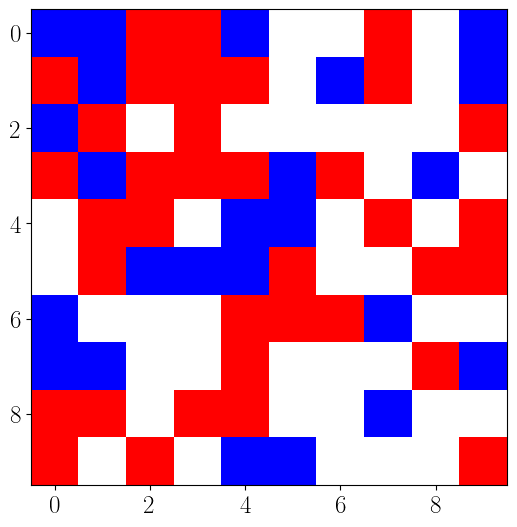

In [27]:
matrix_grid = np.zeros((modelo_p1.grid.width, modelo_p1.grid.height))

for vecino in modelo_p1.grid.coord_iter():
    cell_content, x, y = vecino
    # Como usaremos un mapa de color (cmap) asignaremos un color con el valor 0 y otros dos 
    # colores diferentes con los valores  0.5 y 1
    if cell_content == None:
        matrix_grid[x][y] = 0 
    else:
        if cell_content.color == "blue":
            matrix_grid[x][y] = 0.5
        if cell_content.color == "red":
            matrix_grid[x][y] = 1

plt.imshow(matrix_grid, cmap=cmapp,interpolation='nearest')

Iteramos el modelo unas 1000 veces

In [28]:
for i in range(1000):
    modelo_p1.step()

Dibujamos los agentes 1000 iteraciones después

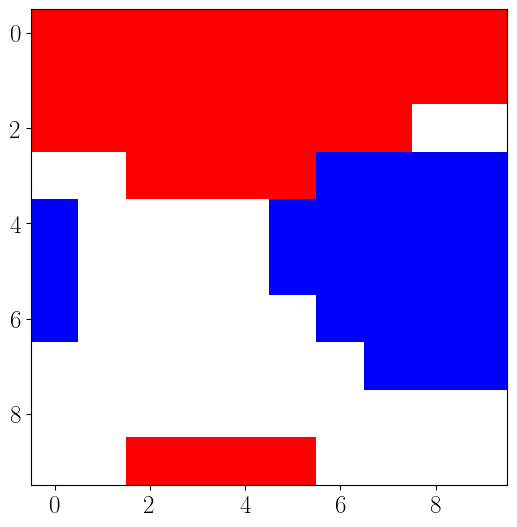

In [29]:
matrix_grid = np.zeros((modelo_p1.grid.width, modelo_p1.grid.height))

for vecino in modelo_p1.grid.coord_iter():
    cell_content, x, y = vecino
    # Como usaremos un mapa de color (cmap) asignaremos un color con el valor 0 y otros dos 
    # colores diferentes con los valores  0.5 y 1
    if cell_content == None:
        matrix_grid[x][y] = 0
    else:
        if cell_content.color == "blue":
            matrix_grid[x][y] = 0.5
        if cell_content.color == "red":
            matrix_grid[x][y] = 1

plt.imshow(matrix_grid, cmap=cmapp, interpolation='nearest')

## Obtener datos de nuestro modelo

Como anteriormente habíamos definido las clases `AgenteSchelling` y `ModeloSchelling`, el atributo _tolerancia_ era parte del agente sin embargo es un atributo del modelo. Así que en las siguientes redefiniciones ya forma parte de los atributos del modelo.

In [30]:
class AgenteSchelling(Agent):
    """
    Agente del modelo de Schelling
    Esta clase implementa un agente para el modelo de segregación de Schelling en una malla discreta.
    Atributos:
        tipo/color: "rojo" "azul". Str.
        pos: posición del agente. Tupla de enteros.
        modelo: Nuestro clase modelo. Modelo mesa.
    """
    def __init__(self,unique_id, model,color,pos):
        # Aqui van los atributos del agente
        super().__init__(unique_id,model)
        self.color = color
        self.pos = pos
        self.model  = model
        
    def step(self):
        #Buscar si hay algún otro agente en su vecindad cercana. Para el modelo de segregación utilizamos una vecindad de Moore
        vecinos = self.model.grid.get_neighbors(self.pos, moore=True, include_center=False)
        
        # Contamos cuantos agentes vecinos son similares a nuestro agente
        vecindad = 0
        for i in vecinos:
            if i.color == self.color:
                vecindad += 1 # vecindad = vecindad + 1
                
        vecindad /= 8 # vecindad =  vecindad / 8         
        
        # Si el porcentaje de vecinos es menor a cierto porcentaje de tolerancia,
        # el agente se mueve a un lugar vacío
        if vecindad < self.model.tolerancia:
            self.model.grid.move_to_empty(self)
        

In [31]:
class ModeloSchelling(Model):
    """
    Modelo de Schelling,
    Esta clase implementa el modelo de segregación de Schelling en una malla discreta.

    ancho: ancho de la malla. Int
    largo: largo de la malla. Int
    tolerancia: porcentaje de vecinos al menos iguales al del agente. Float.
    cantidad: número de agentes que colocaremos en la malla. Int
    """
    def __init__(self,ancho,largo, cantidad,tolerancia):
        self.ancho = ancho
        self.largo = largo
        self.tolerancia = tolerancia
        self.cantidad = cantidad
        colores = ["red", "blue"]
        
        # Activamos el orden aleatorio
        self.schedule = RandomActivation(self)
        self.grid = SingleGrid(ancho, largo, torus= True)

        for i in range(cantidad):
            color = self.random.choice(colores)
            pos = self.grid.find_empty()
            # Como estamos dentro de la clase para hacer referencia al modelo lo hacemos como self
            agente = AgenteSchelling(i,self, color,pos)
            # Después de crear el agente tenemos que colocarlo en la malla
            self.grid.place_agent(agente, pos)
            # De igual forma una vez creado el agente tenemos que 'agendarlo'
            self.schedule.add(agente)
    def step(self):
        # Avanza un paso en el tiempo.
        self.schedule.step()

Definimos una función para saber en promedio cuantos vecinos similares estan alrededor de cada agente

In [32]:
#Porcentaje de vecinos que son iguales a nuestro agente()
def simi(model):
    promedio_similaridad = []
    for agente in model.schedule.agents:
        vecinos = model.grid.get_neighbors(agente.pos, moore=True, include_center=False)
        similaridad = 0

        for vecino in vecinos:
            if vecino.color == agente.color:
                similaridad += 1
        similaridad /= 8
        promedio_similaridad.append(similaridad)

    promedio_similaridad = np.array(promedio_similaridad)

    return promedio_similaridad.mean()


In [33]:
modelo_test = ModeloSchelling(10,10,60,0.4)
for i in range(100):
    modelo_test.step()
    print(simi(modelo_test))

0.35
0.37083333333333335
0.4041666666666667
0.44583333333333336
0.5416666666666666
0.5375
0.5375
0.5458333333333333
0.575
0.6125
0.6583333333333333
0.6541666666666667
0.6458333333333334
0.6375
0.6208333333333333
0.6541666666666667
0.6375
0.6333333333333333
0.675
0.6791666666666667
0.6333333333333333
0.7
0.6708333333333333
0.6916666666666667
0.6833333333333333
0.6916666666666667
0.7
0.6791666666666667
0.675
0.6916666666666667
0.6833333333333333
0.6875
0.7041666666666667
0.725
0.6833333333333333
0.7041666666666667
0.7083333333333334
0.7125
0.7083333333333334
0.6916666666666667
0.6833333333333333
0.6958333333333333
0.7041666666666667
0.6791666666666667
0.7041666666666667
0.7
0.7
0.6958333333333333
0.7041666666666667
0.7041666666666667
0.7125
0.7125
0.6958333333333333
0.7166666666666667
0.7
0.7
0.7
0.7166666666666667
0.7125
0.6958333333333333
0.6958333333333333
0.6958333333333333
0.7125
0.7166666666666667
0.7041666666666667
0.7166666666666667
0.725
0.725
0.7083333333333334
0.70416666666666

### El recolector de datos


In [34]:
from mesa.datacollection import DataCollector

In [35]:
class ModeloSchelling(Model):
    """
    Modelo de Schelling,
    Esta clase implementa el modelo de segregación de Schelling en una malla discreta.

    ancho: ancho de la malla. Int
    largo: largo de la malla. Int
    cantidad: número de agentes que colocaremos en la malla. Int
    tolerancia: porcentaje de vecinos al menos iguales al del agente. Float.
    """
    def __init__(self,ancho,largo, cantidad,tolerancia):
        self.ancho = ancho
        self.largo = largo
        self.tolerancia = 0.4
        self.cantidad = cantidad
        colores = ["red", "blue"]

        # Activamos el orden aleatorio
        self.schedule = RandomActivation(self)
        self.grid = SingleGrid(ancho, largo, torus= True)
        
        for i in range(cantidad):
            color = self.random.choice(colores)
            pos = self.grid.find_empty()
            # Como estamos dentro de la clase para hacer referencia al modelo lo hacemos como self
            agente = AgenteSchelling(i,self, color,pos)
            # Después de crear el agente tenemos que colocarlo en la malla
            self.grid.place_agent(agente, pos)
            # De igual forma una vez creado el agente tenemos que 'agendarlo'
            self.schedule.add(agente)
            
        # Recolectamos los datos de la similiaridad de vecinos
        self.datacollector = DataCollector(model_reporters = {'Similitud':simi})

    def step(self):
        # En cada paso recolectamos hacemos la recolección de datos
        self.datacollector.collect(self)
        # Avanza un paso en el tiempo.
        self.schedule.step()

Inicializamos el modelo y lo corremos 100 veces.

Tenemos una malla de 10x10 con 60 agentes colocados al azar y para que se quede en esa posición al menos 40% de sus vecinos deben ser del mismo tipo

In [36]:
modelo_test = ModeloSchelling(10,10,60,0.4)
for i in range(100):
    modelo_test.step()
tabla_datos_modelo = modelo_test.datacollector.get_model_vars_dataframe()

In [37]:
modelo_test = ModeloSchelling(10,10,60,0.4)
for i in range(100):
    modelo_test.step()
tabla_datos_modelo2 = modelo_test.datacollector.get_model_vars_dataframe()

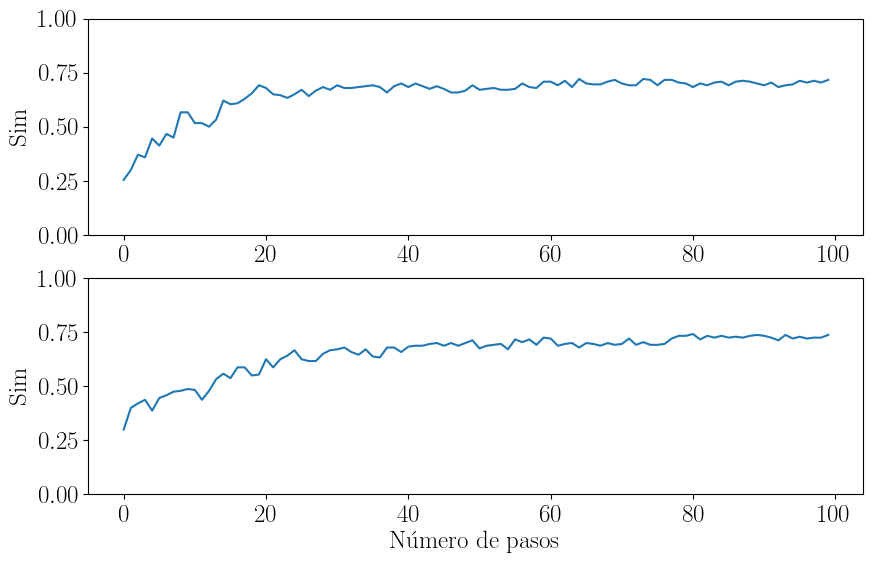

In [38]:
figura = plt.figure()
ax_run1 = figura.add_subplot(211)
ax_run2 = figura.add_subplot(212)
ax_run2.set_xlabel('Número de pasos')
ax_run1.set_ylabel('Sim') # Similaridad
ax_run2.set_ylabel('Sim')
ax_run1.set_ylim(0,1)
ax_run2.set_ylim(0,1)
ax_run1.plot(tabla_datos_modelo)
ax_run2.plot(tabla_datos_modelo2)

## Batch Runner

El batch runner nos facilita realizar una exploración estadística de parámetros de nuestro modelo. Para poder activarlo necesitamos escribir el atributo `self.running = True` dentro del nuestra clase modelo.

In [39]:
from mesa.batchrunner import BatchRunner

In [40]:
class ModeloSchelling(Model):
    """
    Modelo de Schelling,
    Esta clase implementa el modelo de segregación de Schelling en una malla discreta.

    ancho: ancho de la malla. Int
    largo: largo de la malla. Int
    cantidad: número de agentes que colocaremos en la malla. Int
    tolerancia: porcentaje de vecinos al menos iguales al del agente. Float.
    """
    def __init__(self,ancho,largo, cantidad,tolerancia):
        self.ancho = ancho
        self.largo = largo
        self.tolerancia = 0.4        
        self.cantidad = cantidad
        colores = ["red", "blue"]
        
        # Activamos el orden aleatorio
        self.schedule = RandomActivation(self)
        self.grid = SingleGrid(ancho, largo, torus= True)

        # parametro necesario para correr el batch runner y la visualización
        self.running = True
        
        for i in range(cantidad):
            color = self.random.choice(colores)
            pos = self.grid.find_empty()
            # Como estamos dentro de la clase para hacer referencia al modelo lo hacemos como self
            agente = AgenteSchelling(i,self, color,pos)
            # Después de crear el agente tenemos que colocarlo en la malla
            self.grid.place_agent(agente, pos)
            # De igual forma una vez creado el agente tenemos que 'agendarlo'
            self.schedule.add(agente)

        self.datacollector = DataCollector(model_reporters = {'Similitud':simi})

    def step(self):
        # Avanza un paso en el tiempo.
        self.datacollector.collect(self)
        self.schedule.step()

Usamos un diccionario para los parámetros fijos y otro para los parámetros variables

In [41]:
fixed_params = {'ancho':10,'largo':10, 'cantidad': 60}
variable_params  = {'tolerancia':np.linspace(0.3,0.8,num=20)}

Definimos la especificaciones del *batch run*. `max_steps` es el número de pasos que correrá el modelo dados unos parámetros iniciales, en este caso serán `100` pasos. `iterations` es número de repeticiones que se realizarán para cada combinación de todos los parámetros. Dados los parámetros que hemos definido, tenemos que en todas las simulaciones el ancho y el largo de la malla de 10x10 con 60 agentes desde siempre. 

In [42]:
batch_run = BatchRunner(
    ModeloSchelling,
    variable_params,
    fixed_params,
    iterations=10,
    max_steps=100,
    model_reporters={"Similaridad": simi}
)

In [43]:
# Ejecutamos el batch run
batch_run.run_all()

200it [00:20,  9.70it/s]


In [44]:
# obtenemos los datos de la propiedad del que medimos de nuestro modelo
datos  = batch_run.get_model_vars_dataframe()

In [45]:
datos

,tolerancia,Run,Similaridad,ancho,largo,cantidad
0,0.3,0,0.729167,10,10,60
1,0.3,1,0.712500,10,10,60
2,0.3,2,0.679167,10,10,60
3,0.3,3,0.741667,10,10,60
4,0.3,4,0.720833,10,10,60
...,...,...,...,...,...,...
195,0.8,195,0.691667,10,10,60
196,0.8,196,0.720833,10,10,60
197,0.8,197,0.741667,10,10,60
198,0.8,198,0.754167,10,10,60


Cada punto en la gráfica es el resultado final de la _similaridad_ después de una corrida de 100 pasos. Para cada valor de _tolerancia_ tenemos 10 puntos.

(0.0, 1.0)

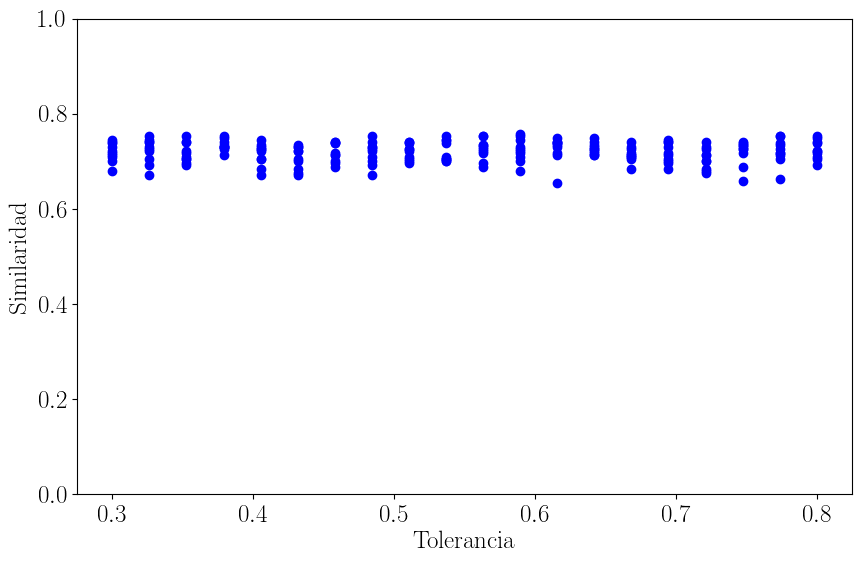

In [46]:
plt.plot(datos.tolerancia, datos.Similaridad,'bo')
plt.xlabel('Tolerancia')
plt.ylabel('Similaridad')
plt.ylim(0,1)

## Visualización

Aunque para la visualización es suficiente colocar la clase modelo y agente en un archivo separado (`ModeloSegregacion.py`) y la visualización en otro (`ModeloSegregacion_Viz.py`) es recomendable seguir la estructura que se presenta en los ejemplos del [github de `MESA`](https://github.com/projectmesa/mesa/tree/main/examples)

La visualización se ejecuta al ejercutar el archivo la visualización (`python ModeloSegregacion_Viz.py`), lo que abrirá una ventana dentro de nuestro navegador predeterminado.

In [ ]:
from mesa.visualization.modules import CanvasGrid, ChartModuledule
from mesa.visualization.ModularVisualization import ModularServer

# Separamos la clase ModeloSchelling y AgenteSchelling en archivo diferente al de la visualización
from ModeloSegregacion import ModeloSchelling

# La función agent_portrayal toma un objeto agente y regresa un diccionario con las propiedades de la forma 
# en la que será representado en la visualización
def agent_portrayal(agent):
    portrayal = {"Shape": "rect",
                 "Color": agent.color,
                 "Filled": "true",
                 "Layer": 0,
                 "w": 1,
                 "h": 1}
    return portrayal

# Definimos una malla de 30x30 con una resolución de 500x500 pixeles
grid = CanvasGrid(agent_portrayal, 30, 30, 500, 500)

# Agregamos un gráfico que va monitoreandoque va actualizándose paso a paso. En la 
chart = ChartModule([{"Label": "Similaridad",
                      "Color": "Black"}],
                    data_collector_name='datacollector')

# Cargamos tanto la malla como el gráfico dentro de ModularServer además especificamos
# los parámetros que utilizaremos en la simulación
server = ModularServer(ModeloSchelling,
                       [grid,chart],
                       "Modelo de segregacion",
                       {"density":0.5, "umbral":0.4, "width":30, "height":30})

server.port = 8521 # The default
server.launch() 

## Modelo implementado en un espacio continuo

Aprovecharemos que el modelo de Schelling se puede implementar en un espacio continuo con modificar unas cuantas líneas en el código que ya tenemos.

En vez de import `SingleGrid` importaremos `ContinuosSpace`

In [48]:
from mesa.space import ContinuousSpace

In [49]:
class SchellingAgent(Agent):
    """
    Agente del modelo de Schelling
    Esta clase implementa un agente para el modelo de segregación de Schelling en el espacio discreto.
    Atributos:
        tipo/color: "rojo" "azul". Str.
        modelo: Nuestro clase modelo. Modelo mesa.
    """
    def __init__(self, unique_id, model,color):
        # Aqui van los atributos del agente
        super().__init__(unique_id, model)
        self.color = color
        
    def step(self):
        #Buscar si hay algún otro agente en su vecindad cercana. Para el modelo de segregación utilizamos una vecindad de Moore
        vecinos = self.model.space.get_neighbors(self.pos, self.model.vecindad, False)
        if len(vecinos) > 0:
            afinidad = 0

            # Contamos cuantos agentes vecinos son similares a nuestro agente
            for i in vecinos:
                if i.color == self.color:
                    afinidad += 1 

            afinidad /= len(vecinos) # el número de vecinos es variable

            # Si el porcentaje de vecinos es menor a cierto porcentaje de tolerancia,
            # el agente se mueve a un lugar vacío
            if afinidad < self.model.umbral:
                x = self.random.random() * self.model.space.x_max
                y = self.random.random() * self.model.space.y_max
                new_pos = np.array((x, y))
                self.model.space.move_agent(self,new_pos)
    

In [50]:
class SchellingModel(Model):
    """
    Modelo de Schelling,
    Esta clase implementa el modelo de segregación de Schelling en una malla discreta.

    ancho: ancho de la malla. Int
    largo: largo de la malla. Int
    cantidad: número de agentes que colocaremos en la malla. Int
    tolerancia: porcentaje de vecinos al menos iguales al del agente. Float.
    """
    def __init__(self, N, width, height,umbral=0.6):
        tipo = ['Blue','Red']
        self.population = N
        self.umbral = umbral
        # En este caso los vecinos son aquellos que estan dentro de un área circular
        self.vecindad = 1 # es el radio de la vecindad circular
        
        # Activamos el orden aleatorio
        self.schedule = RandomActivation(self)
        self.space = ContinuousSpace(width, height, True)

        # parametro necesario para correr el batch runner y la visualización
        self.running = True

        # Crear agentes
        for i in range(self.population):
            x = self.random.random() * self.space.x_max
            y = self.random.random() * self.space.y_max
            pos = np.array((x, y))
            
            color = self.random.choice(tipo)
            agente = SchellingAgent(i, self,color)
            
            # Después de crear el agente tenemos que colocarlo en el espacio
            self.space.place_agent(agente, pos)
            # De igual forma una vez creado el agente tenemos que 'agendarlo'
            self.schedule.add(agente)
            
            self.datacollector = DataCollector(
                model_reporters={"Similaridad": simi},
                agent_reporters={"Tipo": "color",
                                 "X": lambda z: z.pos[0],
                                 "Y": lambda z: z.pos[1],
                                 "Posicion": "pos"})

    def step(self):
        """Incrementa un paso en el tiempo"""
        self.datacollector.collect(self)
        self.schedule.step()

    def run_model(self, n_pasos=100):
        for i in range(n_pasos):
#             print('Paso {}'.format(i))
            self.step()
        
def simi(model):
    pct_simi = []
    for agente in modelo.schedule.agents:
        vecinos = model.space.get_neighbors(agente.pos, model.vecindad, False)
        if len(vecinos) > 0: 
            afinidad = 0
            for j in vecinos:
                if j.color == agente.color:
                    afinidad += 1
            afinidad /= len(vecinos)
        else:
            afinidad = 1
        pct_simi.append(afinidad)
    pct_simi = np.array(pct_simi)

    return pct_simi.mean()

Inicializamos el modelo con `500` agentes en un espacio de `10x10` y hacemos una corrida de `100` pasos.

In [57]:
modelo = SchellingModel(500,10,10)

### Posición inicial

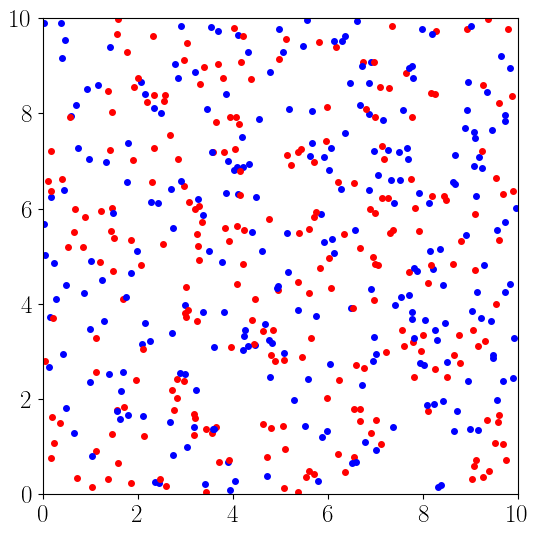

In [58]:
figura = plt.figure()
escater = figura.add_subplot(111)
for c in modelo.schedule.agents:
    escater.plot(c.pos[0],c.pos[1],color=c.color, marker ='o',ms=4)
    
escater.set(ylim=(0,10),xlim=(0,10))
escater.set_aspect('equal','box')


In [59]:
# En vez de un for por fuera del objeto se puede usar el método run_model
modelo.run_model(100)

### Posición después de 100 pasos

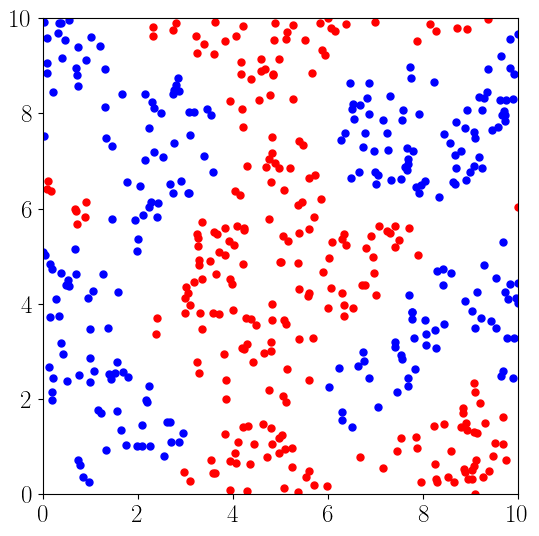

In [60]:
figura = plt.figure()
escater = figura.add_subplot(111)
for c in modelo.schedule.agents:
    escater.plot(c.pos[0],c.pos[1],color=c.color, marker ='o',ms=5)
    
escater.set(ylim=(0,10),xlim=(0,10))
escater.set_aspect('equal','box')


In [61]:
tabla_agentes = modelo.datacollector.get_agent_vars_dataframe()
tabla_modelo = modelo.datacollector.get_model_vars_dataframe()

Text(0, 0.5, 'Similaridad')

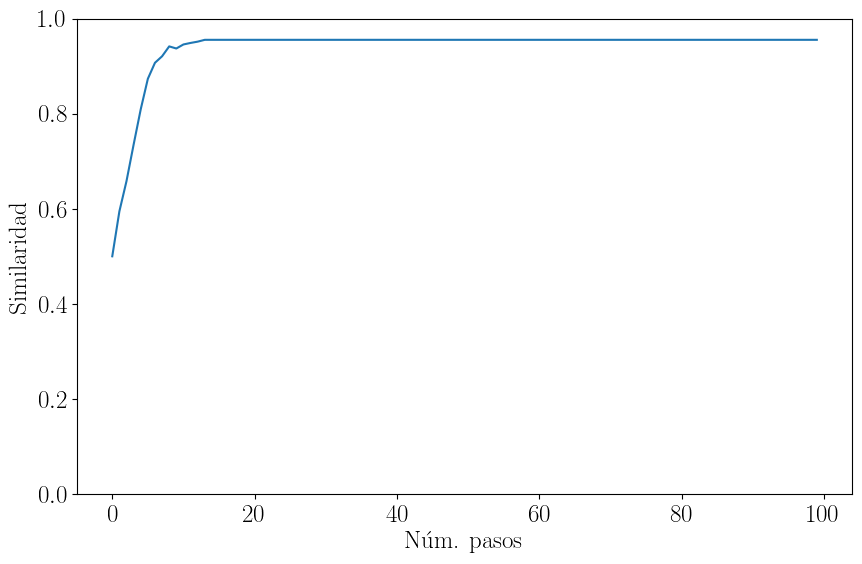

In [62]:
plt.plot(tabla_modelo.Similaridad.values)
plt.ylim(0,1)
plt.xlabel('Núm. pasos')
plt.ylabel('Similaridad')


Implementar esta versión continua en el `Batch runner` es muy parecido a como lo hicimos en la sección [Batch Runner](##Batch-Runner). Sin embargo para la visualización es un poco más complicado dado que esa aún no esta muy desarrollada en `MESA`, no obstante pueden ver el ejemplo de [Boid Flockers]()

## Extensión del modelo

* Agregar más de dos tipos de agentes
* Permitir que cada agente pueda tener distintos tipo de tolerancia.
* Además de buscar cierto porcentaje de vecinos similares se puede pedir también cierto porcentaje de diversidad en los vecinos.